In [1]:
import os
home = "/content"
os.chdir(home)
os.getcwd()

'/content'

In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
# Install specified versions of `torch` and `torchvision`, before installing mmf (causes an issue)
!pip install torch==1.6.0 torchvision==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 552.8MB 31kB/s 
     |████████████████████████████████| 5.8MB 23.5MB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.6.0+cu92 which is incompatible.
  Found existing installation: torch 1.8.0+cu101
    Uninstalling torch-1.8.0+cu101:
      Successfully uninstalled torch-1.8.0+cu101
  Found existing installation: torchvision 0.9.0+cu101
    Uninstalling torchvision-0.9.0+cu101:
      Successfully uninstalled torchvision-0.9.0+cu101


**LOADING DATASET**

In [4]:
import json
from google.colab import files
uploaded = files.upload()


Saving train.jsonl to train.jsonl


In [5]:
import pandas as pd
df1= pd.read_json('train.jsonl',lines=True)
df1.head(10)

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."
5,16952,img/16952.png,0,go sports! do the thing! win the points!
6,76932,img/76932.png,0,fine you're right. now can we fucking drop it?
7,70914,img/70914.png,1,tattoos are bad for your health i know 5 milli...
8,2973,img/02973.png,0,how long can i run? till the chain tightens
9,58306,img/58306.png,0,what is he hiding? we need to see his tax retu...


In [6]:
X=df1['text']
print(X)

0        its their character not their color that matters
1       don't be afraid to love again everyone is not ...
2                                putting bows on your pet
3       i love everything and everybody! except for sq...
4       everybody loves chocolate chip cookies, even h...
                              ...                        
8495                    nobody wants to hang auschwitz me
8496    when god grants you a child after 20 years of ...
8497    gays on social media: equality! body positivit...
8498    having a bad day? you could be a siamese twin ...
8499    i hate muslims too they take their religion to...
Name: text, Length: 8500, dtype: object


**TEXT PREPROCESSING**

In [7]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
##### CLEANING THE DATA #####

import re
import string
def cleaning(text):        
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)     
    # removing the emojies              
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)   
    
    # removing the stop-words          
    text_tokens = word_tokenize(text)
    stop_words = stopwords.words()
    tokens_without_sw = [word for word in text_tokens if not word in stop_words]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence
    
    return text
dt = df1['text'].apply(cleaning)
print(dt)

0                                 character color matters
1                       dont afraid love everyone like ex
2                                            putting bows
3       love everything everybody except squirrels hat...
4       everybody loves chocolate chip cookies even hi...
                              ...                        
8495                          nobody wants hang auschwitz
8496    god grants child 20 years marriage israel bomb...
8497    gays social media equality body positivity lov...
8498    bad day could siamese twin attached gay brothe...
8499    hate muslims religion seriously pathetic weakl...
Name: text, Length: 8500, dtype: object


In [9]:
#### Splitting text into words #######
df1["data"] = dt.apply(nltk.word_tokenize)
tokenized_data = df1["data"]
#print(tokenized_data.head())
print(tokenized_data)

0                             [character, color, matters]
1                [dont, afraid, love, everyone, like, ex]
2                                         [putting, bows]
3       [love, everything, everybody, except, squirrel...
4       [everybody, loves, chocolate, chip, cookies, e...
                              ...                        
8495                     [nobody, wants, hang, auschwitz]
8496    [god, grants, child, 20, years, marriage, isra...
8497    [gays, social, media, equality, body, positivi...
8498    [bad, day, could, siamese, twin, attached, gay...
8499    [hate, muslims, religion, seriously, pathetic,...
Name: data, Length: 8500, dtype: object


In [10]:
###### STEMMING #####
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

df1['stemmed'] = tokenized_data.apply(lambda x: [stemmer.stem(y) for y in x])
stemmed_words= df1['stemmed']
print(stemmed_words)

0                                [charact, color, matter]
1                 [dont, afraid, love, everyon, like, ex]
2                                              [put, bow]
3       [love, everyth, everybodi, except, squirrel, h...
4       [everybodi, love, chocol, chip, cooki, even, h...
                              ...                        
8495                      [nobodi, want, hang, auschwitz]
8496    [god, grant, child, 20, year, marriag, israel,...
8497    [gay, social, media, equal, bodi, posit, love,...
8498    [bad, day, could, siames, twin, attach, gay, b...
8499     [hate, muslim, religion, serious, pathet, weakl]
Name: stemmed, Length: 8500, dtype: object


In [11]:
import gensim

In [12]:
from gensim.models import Word2Vec

model = Word2Vec(stemmed_words, min_count=1)

print(model)
words = list(model.wv.vocab)
print(words)

print(model['word'])

model.save('/content/model.bin')

new_model = Word2Vec.load('/content/model.bin')
print(new_model)

Word2Vec(vocab=6699, size=100, alpha=0.025)
['charact', 'color', 'matter', 'dont', 'afraid', 'love', 'everyon', 'like', 'ex', 'put', 'bow', 'everyth', 'everybodi', 'except', 'squirrel', 'hate', 'chocol', 'chip', 'cooki', 'even', 'hitler', 'go', 'sport', 'thing', 'win', 'point', 'fine', 'your', 'right', 'fuck', 'drop', 'tattoo', 'bad', 'health', 'know', '5', 'million', 'peopl', 'die', 'long', 'run', 'chain', 'tighten', 'hide', 'need', 'see', 'tax', 'return', 'let', 'stop', 'hillari', 'delet', '30000', 'email', 'use', 'bleach', 'bit', 'hard', 'drive', 'destroy', 'phone', 'hammer', 'talk', 'anyth', 'truth', 'uncensor', 'jew', 'mad', 'get', 'fuhreri', 'remov', 'polish', 'chemic', 'nobodi', 'bat', 'eye', 'brother', 'day', 'without', 'blast', 'wast', 'left', 'shelter', 'black', 'famili', 'want', 'adopt', 'vote', 'casey', 'anthoni', 'watch', 'kid', 'shes', 'guilti', 'soon', 'free', 'ok', 'daughter', 'call', 'anoth', 'daddi', 'religion', 'peac', 'find', 'there', 'open', 'role', 'first', 'ladi'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)


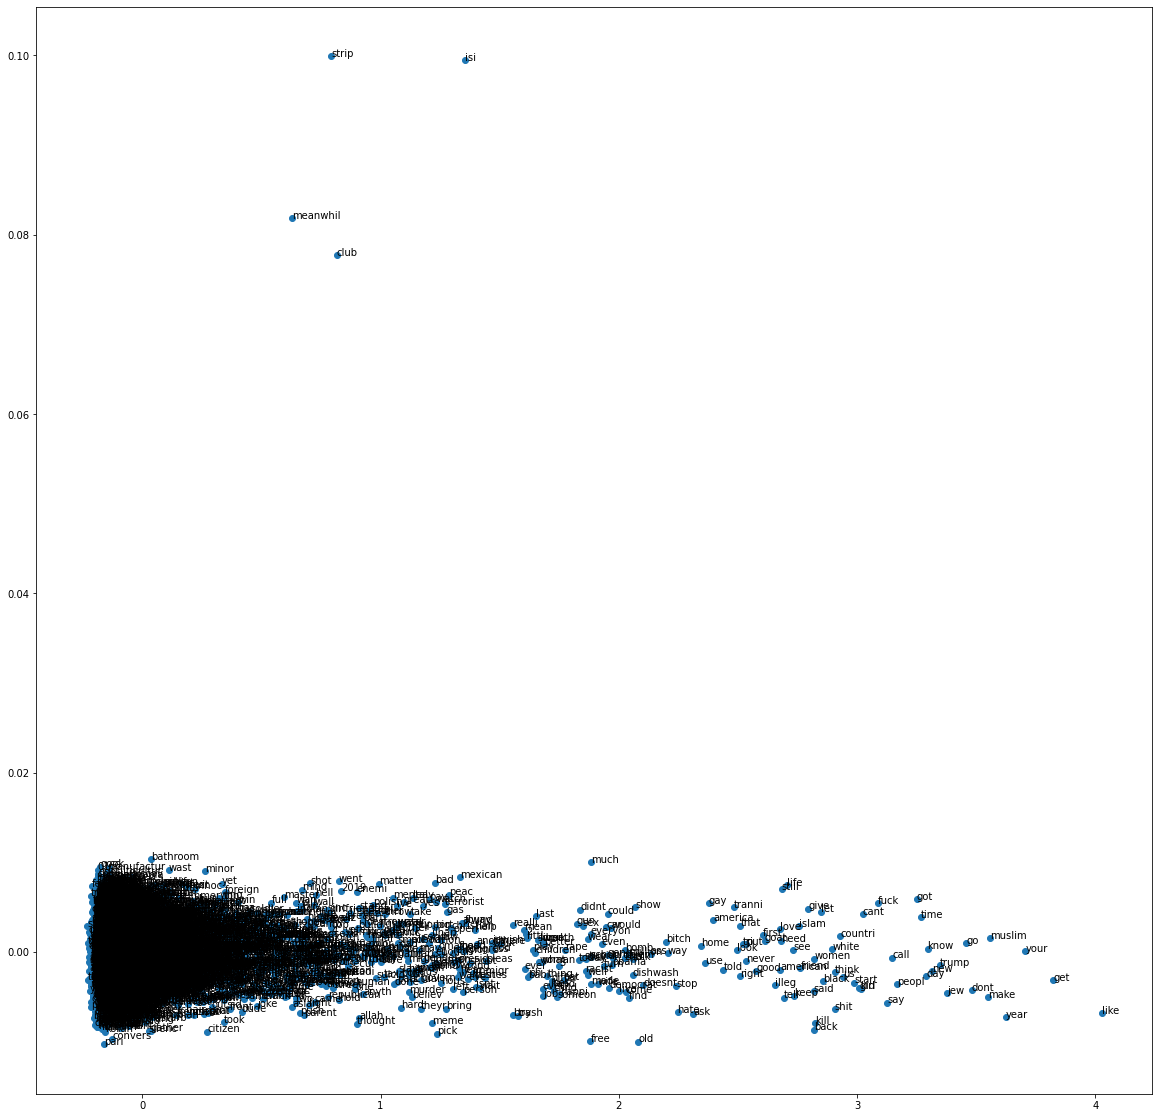

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.figure(figsize=(20,20))
plt.scatter(result[:,0], result[:,1])
for i,word in enumerate(words):
  plt.annotate(word, xy=(result[i,0], result[i,1]))
plt.show()

In [15]:
#finding most similar embeddings
model.wv.most_similar('pick')

[('back', 0.9998001456260681),
 ('new', 0.9997605085372925),
 ('ass', 0.9997544288635254),
 ('right', 0.9997533559799194),
 ('get', 0.9997506141662598),
 ('girl', 0.9997482299804688),
 ('year', 0.9997473955154419),
 ('got', 0.9997458457946777),
 ('let', 0.9997437596321106),
 ('call', 0.9997422099113464)]